# Setup Environment

In [ ]:
!pip install --upgrade transformers peft

In [1]:
import transformers
import peft
print(transformers.__version__)
print(peft.__version__)

4.57.1
0.17.1


In [2]:
import numpy as np, pandas as pd, torch, shutil, os, seaborn as sns, matplotlib.pyplot as plt
import torch.nn as nn, gc
from collections import Counter
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from transformers import (set_seed, BertTokenizer, BertForSequenceClassification,
                          Trainer, TrainerCallback,TrainingArguments, EarlyStoppingCallback)


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Eksplorasi Data

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Kodingan TA/cleaned_final_tanpa_replies.csv")
df

,text,sentiment_label
0,apalagi anak pertama baru tahun terus punya su...,0
1,punya suami tetapi cuma teman yang mau dengark...,0
2,hamil tidak berat klk lingkungannya sehat tida...,1
3,ya allah ingin menangis kalau baca kayak beginian,0
4,ternyata sesakit itu ya jadi ibu hamil,0
...,...,...
10614,punya suami tetapi merasa dia saja yang lelah ...,0
10615,salam kenal semua mamak baru punya akun nih,1
10616,kok ikut menangis ya lihatnya,0
10617,kalau aku sudah diusir,0


In [5]:
# Split data 90% untuk K-fold dan 10% untuk Test
train_df, test_df = train_test_split(df, test_size=0.1, random_state=42)

# Menyimpan hasil split ke dalam Google Drive
train_df.to_csv("/content/drive/MyDrive/Kodingan TA/train_data.csv", index=False)
test_df.to_csv("/content/drive/MyDrive/Kodingan TA/test_data.csv", index=False)

# Menampilkan sample data untuk memastikan hasil split
print(f"Train data shape: {train_df.shape}")
print(f"Test data shape: {test_df.shape}")

Train data shape: (9557, 2)
Test data shape: (1062, 2)


sentiment_label
Negatif    6944
Positif    3675
Name: count, dtype: int64


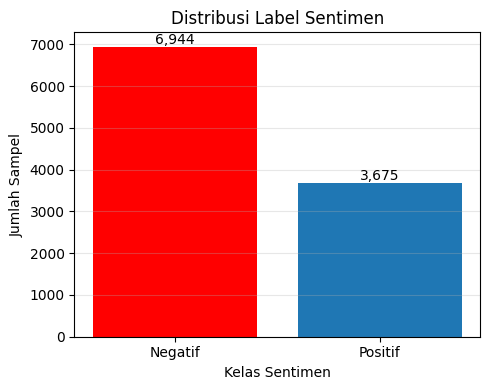

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Hitung jumlah masing-masing kelas
label_map = {0: "Negatif", 1: "Positif"}
counts = df["sentiment_label"].map(label_map).value_counts()
counts = counts.reindex(["Negatif", "Positif"])

print(counts)

# 2. Plot bar chart dengan warna + label angka
plt.figure(figsize=(5, 4))

colors = ["red", "tab:blue"]  # Negatif = merah, Positif = biru
bars = plt.bar(counts.index, counts.values, color=colors)

plt.title("Distribusi Label Sentimen")
plt.xlabel("Kelas Sentimen")
plt.ylabel("Jumlah Sampel")
plt.grid(axis="y", alpha=0.3)

# Tambahkan angka di atas tiap bar
for bar, value in zip(bars, counts.values):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{value:,}",          # pakai pemisah ribuan
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.tight_layout()
plt.show()


# Training Model

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]


===== FOLD 1 =====
Distribusi train: Counter({0: 5008, 1: 2637})


pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/498M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.310700,0.317115,0.860356,0.854892
2,0.168600,0.333059,0.912657,0.904365
3,0.097700,0.398486,0.916318,0.906271
4,0.054500,0.467826,0.915272,0.905741
5,0.029200,0.444022,0.919979,0.911271


Fold 1 - Accuracy: 0.9200, F1: 0.9113

Classification Report:
              precision    recall  f1-score   support

     Negatif       0.94      0.94      0.94      1252
     Positif       0.89      0.88      0.88       660

    accuracy                           0.92      1912
   macro avg       0.91      0.91      0.91      1912
weighted avg       0.92      0.92      0.92      1912



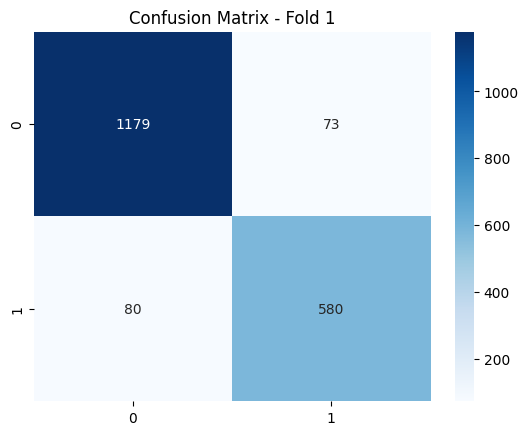

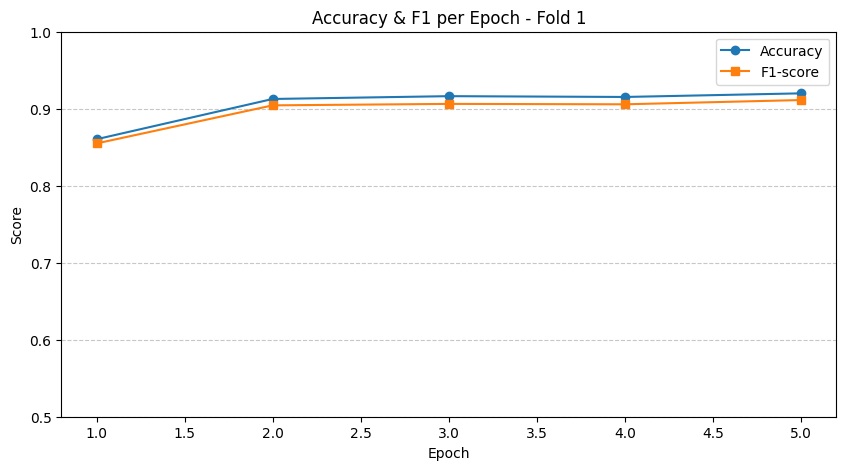

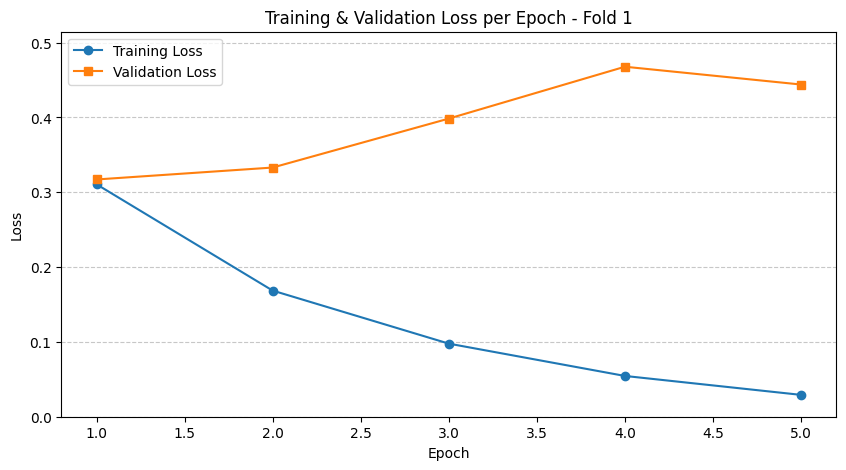

✅ Fold 1 TERBAIK sementara (F1 0.9113)

===== FOLD 2 =====
Distribusi train: Counter({0: 5008, 1: 2637})


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.300500,0.273976,0.875523,0.868562
2,0.176900,0.276383,0.918410,0.911395
3,0.101900,0.328862,0.930962,0.922791
4,0.050800,0.410985,0.927301,0.919331
5,0.030100,0.436982,0.930962,0.923139


Fold 2 - Accuracy: 0.9310, F1: 0.9231

Classification Report:
              precision    recall  f1-score   support

     Negatif       0.94      0.95      0.95      1252
     Positif       0.91      0.89      0.90       660

    accuracy                           0.93      1912
   macro avg       0.93      0.92      0.92      1912
weighted avg       0.93      0.93      0.93      1912



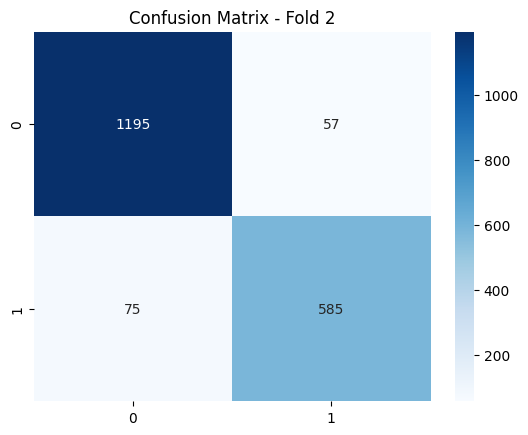

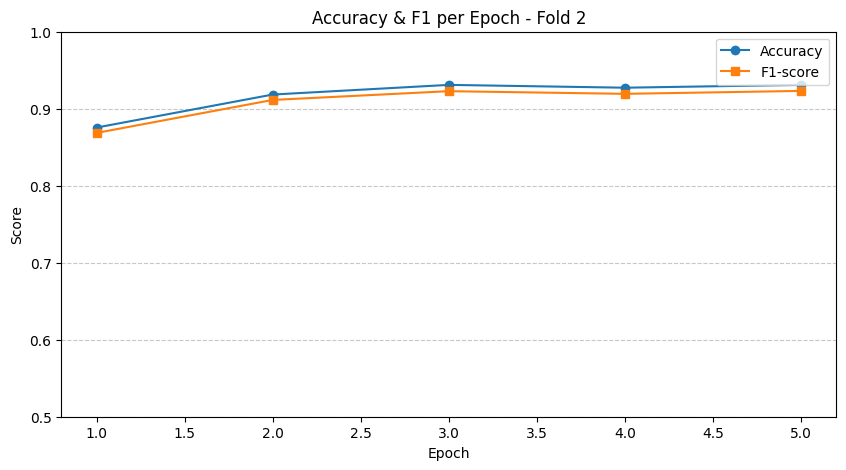

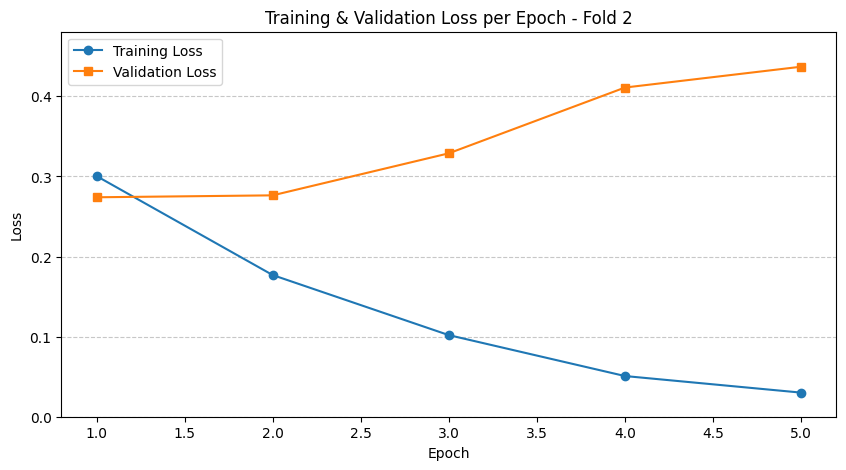

✅ Fold 2 TERBAIK sementara (F1 0.9231)

===== FOLD 3 =====
Distribusi train: Counter({0: 5008, 1: 2638})


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.287700,0.306962,0.862899,0.856845
2,0.172000,0.330339,0.914181,0.903301
3,0.091200,0.369263,0.921507,0.912764
4,0.051900,0.467248,0.918367,0.909004
5,0.021300,0.516645,0.919414,0.910569


Fold 3 - Accuracy: 0.9215, F1: 0.9128

Classification Report:
              precision    recall  f1-score   support

     Negatif       0.94      0.94      0.94      1252
     Positif       0.89      0.88      0.89       659

    accuracy                           0.92      1911
   macro avg       0.91      0.91      0.91      1911
weighted avg       0.92      0.92      0.92      1911



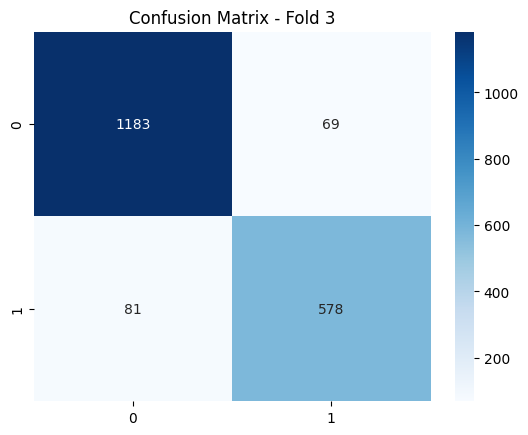

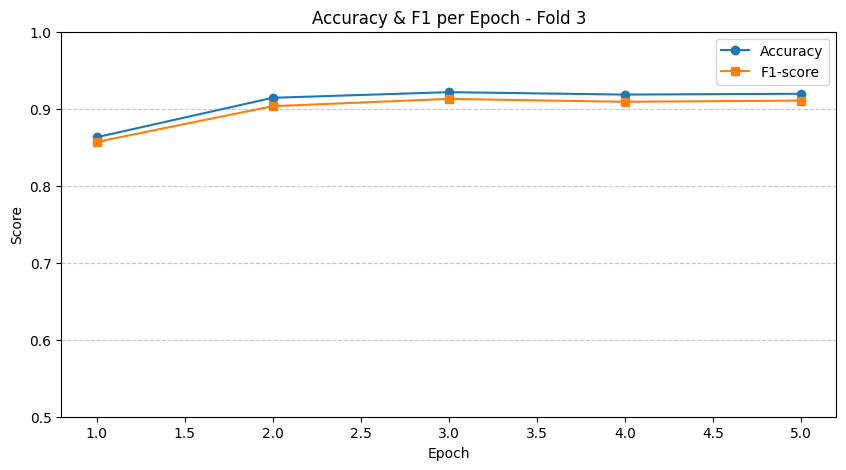

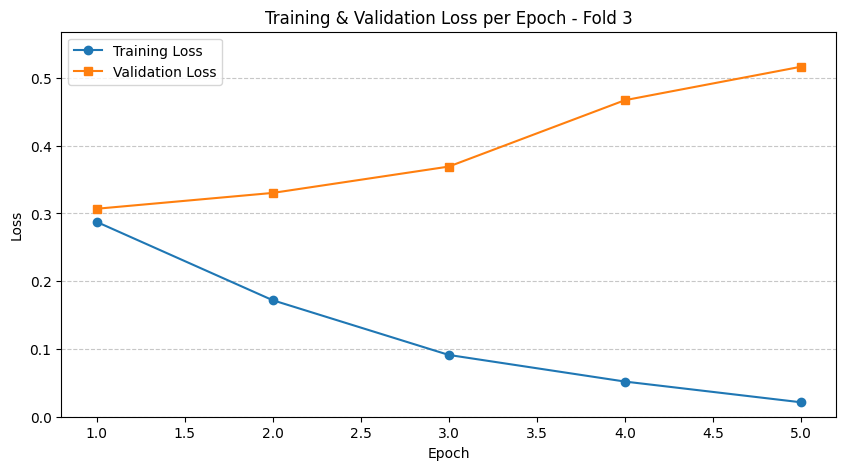

🗑️  Folder fold 3 dihapus

===== FOLD 4 =====
Distribusi train: Counter({0: 5008, 1: 2638})


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.291300,0.231760,0.920460,0.912174
2,0.161900,0.383449,0.868655,0.863248
3,0.097400,0.315203,0.933019,0.927042
4,0.048600,0.389154,0.929880,0.922069
5,0.018900,0.406816,0.934589,0.927749


Fold 4 - Accuracy: 0.9346, F1: 0.9277

Classification Report:
              precision    recall  f1-score   support

     Negatif       0.95      0.95      0.95      1252
     Positif       0.90      0.91      0.91       659

    accuracy                           0.93      1911
   macro avg       0.93      0.93      0.93      1911
weighted avg       0.93      0.93      0.93      1911



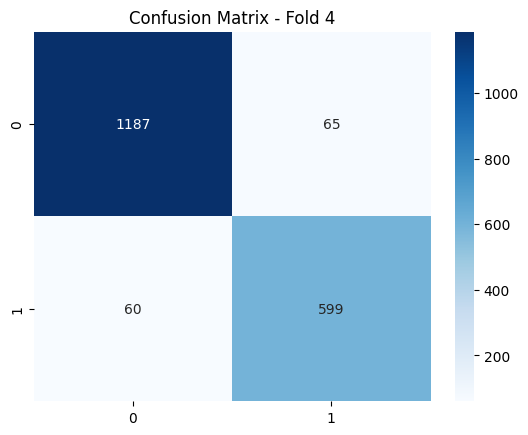

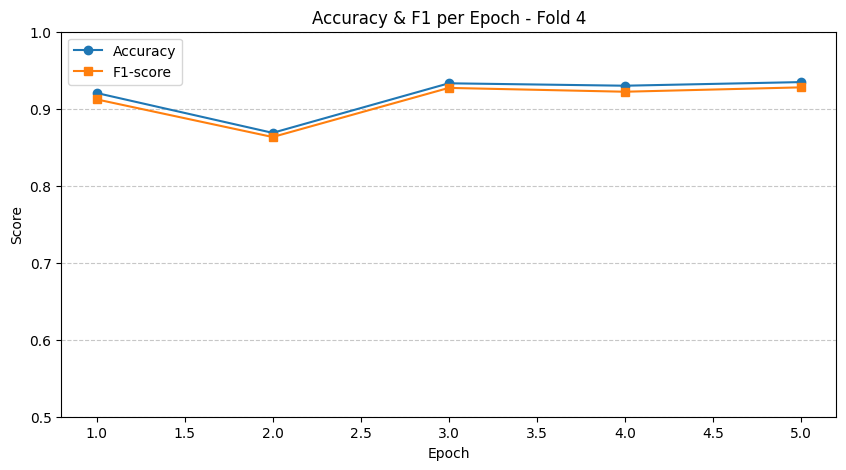

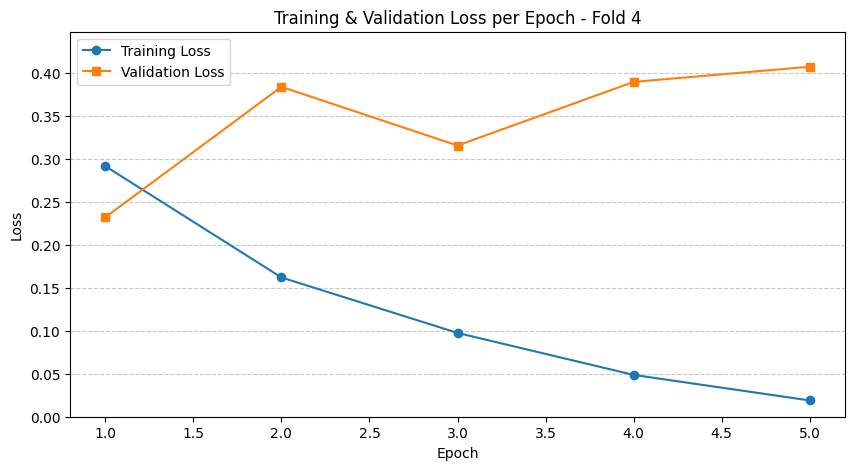

✅ Fold 4 TERBAIK sementara (F1 0.9277)

===== FOLD 5 =====
Distribusi train: Counter({0: 5008, 1: 2638})


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.290900,0.252129,0.903192,0.896731
2,0.170900,0.277094,0.926217,0.918207
3,0.089700,0.376830,0.926217,0.918207
4,0.043100,0.418387,0.917844,0.910005


Fold 5 - Accuracy: 0.9262, F1: 0.9182

Classification Report:
              precision    recall  f1-score   support

     Negatif       0.94      0.95      0.94      1252
     Positif       0.90      0.89      0.89       659

    accuracy                           0.93      1911
   macro avg       0.92      0.92      0.92      1911
weighted avg       0.93      0.93      0.93      1911



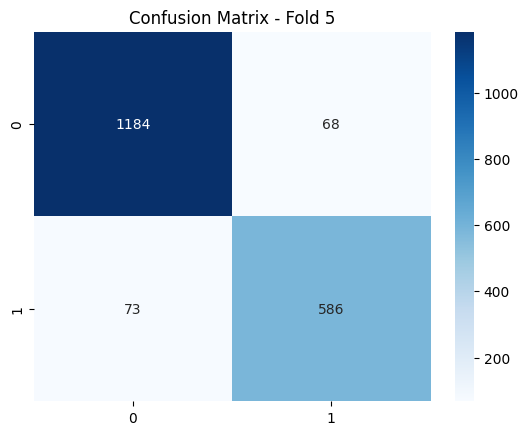

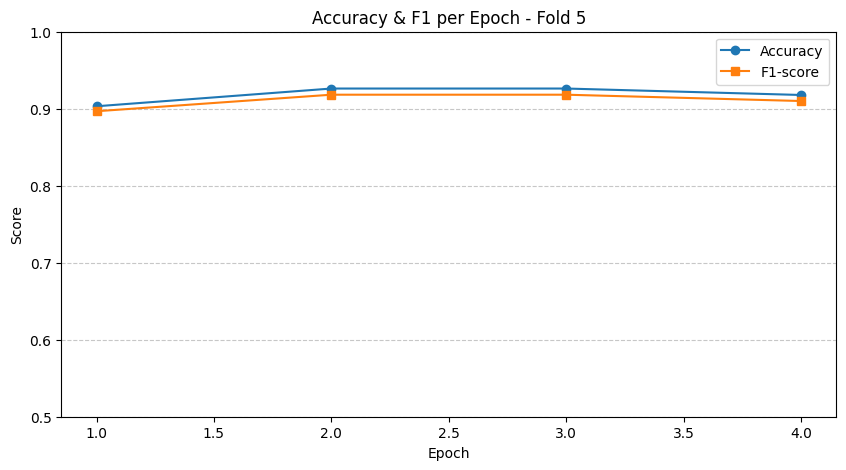

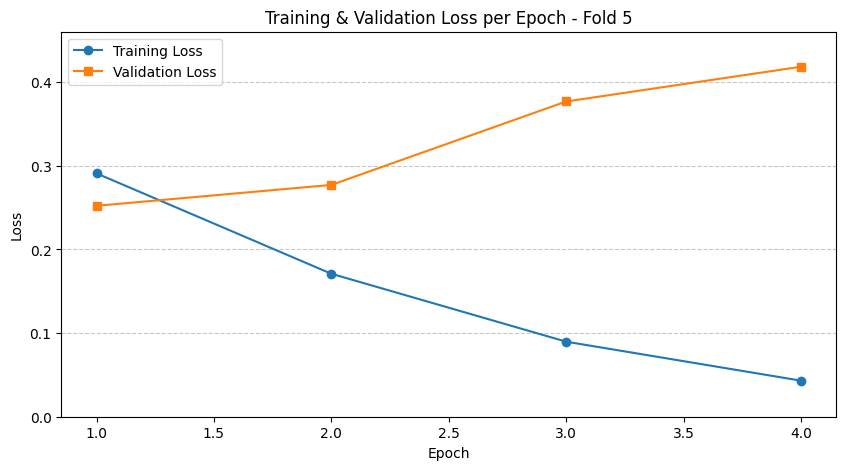

🗑️  Folder fold 5 dihapus

✅ Model TERBAIK (F1: 0.9277) disimpan di: /content/drive/MyDrive/Kodingan TA/indoBERT_model_tanpa_replies/best_model


In [ ]:
set_seed(42)
MODEL     = "indobenchmark/indobert-base-p2"
BEST_DIR  = "/content/drive/MyDrive/Kodingan TA/indoBERT_model_tanpa_replies/best_model"
TMP_ROOT  = "/content/drive/MyDrive/Kodingan TA/indoBERT_model_tanpa_replies/tmp_folds"
os.makedirs(TMP_ROOT, exist_ok=True)

tokenizer = BertTokenizer.from_pretrained(MODEL)

# Membuat dataset untuk training
class IndoBERTDataset(torch.utils.data.Dataset):
    def __init__(self, txt, lab, tok, max_len=128):
        self.txt, self.lab, self.tok, self.max_len = txt, lab, tok, max_len
    def __len__(self): return len(self.txt)
    def __getitem__(self, idx):
        enc = self.tok(str(self.txt[idx]), max_length=self.max_len,
                       padding="max_length", truncation=True, return_tensors="pt")
        item = {k: v.squeeze(0) for k, v in enc.items()}
        item["labels"] = torch.tensor(self.lab[idx], dtype=torch.long)
        return item

# Function for computing metrics
def compute_metrics(pred):
    y_true, y_pred = pred.label_ids, pred.predictions.argmax(-1)
    return {"eval_accuracy": accuracy_score(y_true, y_pred),
            "eval_f1": f1_score(y_true, y_pred, average="macro")}

# ========= TRAINING =========
best_f1, best_tmp = 0.0, None
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Untuk ringkasan performa antar-fold (bukan per-epoch)
accuracies = []   # final accuracy per fold
f1_scores  = []   # final f1 per fold

for fold, (tr_idx, va_idx) in enumerate(skf.split(train_df.text, train_df.sentiment_label), 1):
    print(f"\n===== FOLD {fold} =====")
    print("Distribusi train:", Counter(train_df.sentiment_label.iloc[tr_idx]))

    # Dataset per fold
    tr_ds = IndoBERTDataset(
        train_df.text.iloc[tr_idx].tolist(),
        train_df.sentiment_label.iloc[tr_idx].tolist(),
        tokenizer
    )
    va_ds = IndoBERTDataset(
        train_df.text.iloc[va_idx].tolist(),
        train_df.sentiment_label.iloc[va_idx].tolist(),
        tokenizer
    )

    # Class weight untuk imbalanced data
    cw = torch.tensor(
        compute_class_weight(
            class_weight="balanced",
            classes=np.array([0, 1]),
            y=train_df.sentiment_label.iloc[tr_idx]
        ),
        dtype=torch.float
    )

    model = BertForSequenceClassification.from_pretrained(MODEL, num_labels=2)
    tmp   = f"{TMP_ROOT}/fold_{fold}"

    # TrainingArguments – per dokumen v4.57.1 pakai eval_strategy/save_strategy/logging_strategy
    args = TrainingArguments(
        output_dir                  = tmp,
        eval_strategy               = "epoch",
        save_strategy               = "epoch",
        logging_strategy            = "epoch",
        logging_steps               = 10,
        save_total_limit            = 1,
        load_best_model_at_end      = True,
        metric_for_best_model       = "eval_f1",
        greater_is_better           = True,
        num_train_epochs            = 5,
        per_device_train_batch_size = 16,
        per_device_eval_batch_size  = 16,
        learning_rate               = 3e-5,
        weight_decay                = 0.01,
        fp16                        = True,
        report_to                   = "none",
    )

    # Trainer dengan class weight custom
    class WeightedTrainer(Trainer):
        def __init__(self, class_weights=None, *args, **kwargs):
            super().__init__(*args, **kwargs)
            self.class_weights = class_weights
            # kita nggak pakai num_items_in_batch di loss, jadi set False (sesuai docs)
            self.model_accepts_loss_kwargs = False

        def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=None):
            # forward seperti biasa
            outputs = model(**inputs)
            logits  = outputs.logits
            labels  = inputs["labels"]

            loss_fct = nn.CrossEntropyLoss(weight=self.class_weights.to(model.device))
            loss = loss_fct(logits, labels)
            return (loss, outputs) if return_outputs else loss

    trainer = WeightedTrainer(
        model          = model,
        args           = args,
        train_dataset  = tr_ds,
        eval_dataset   = va_ds,
        compute_metrics= compute_metrics,
        callbacks      = [EarlyStoppingCallback(early_stopping_patience=2)],
        class_weights  = cw
    )

    # ======== TRAIN ========
    trainer.train()

    # ======== AMBIL LOG HISTORY PER EPOCH ========
    history = trainer.state.log_history

    # Training loss per epoch (log 'loss' – bukan 'eval_loss')
    epoch_train_loss = [log["loss"] for log in history if "loss" in log and "eval_loss" not in log]
    # Validation loss per epoch
    epoch_val_loss   = [log["eval_loss"] for log in history if "eval_loss" in log]
    # Accuracy & F1 per epoch
    epoch_acc        = [log["eval_accuracy"] for log in history if "eval_accuracy" in log]
    epoch_f1         = [log["eval_f1"]       for log in history if "eval_f1"       in log]

    # Kadang early stopping bikin jumlah epoch < num_train_epochs
    # Samakan panjang dengan ambil min
    n_epochs_metrics = min(len(epoch_acc), len(epoch_f1), len(epoch_val_loss))  # untuk grafik metrics
    n_epochs_loss    = min(len(epoch_train_loss), len(epoch_val_loss))          # untuk grafik loss

    # ======== EVALUASI AKHIR (BEST MODEL DI FOLD INI) ========
    metrics = trainer.evaluate()
    f1  = metrics["eval_f1"]
    acc = metrics["eval_accuracy"]

    accuracies.append(acc)
    f1_scores.append(f1)

    print(f"Fold {fold} - Accuracy: {acc:.4f}, F1: {f1:.4f}")

    preds  = trainer.predict(va_ds)
    y_true = preds.label_ids
    y_pred = preds.predictions.argmax(-1)

    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=["Negatif", "Positif"]))

    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.show()

    # ========= PLOT 1: Accuracy & F1 per Epoch (fold ini) =========
    if n_epochs_metrics > 0:
        epochs_m = range(1, n_epochs_metrics + 1)

        plt.figure(figsize=(10, 5))
        plt.plot(epochs_m, epoch_acc[:n_epochs_metrics], marker='o', label='Accuracy')
        plt.plot(epochs_m, epoch_f1[:n_epochs_metrics],  marker='s', label='F1-score')
        plt.xlabel('Epoch')
        plt.ylabel('Score')
        plt.title(f'Accuracy & F1 per Epoch - Fold {fold}')
        plt.legend()
        plt.ylim(0.5, 1.0)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

    # ========= PLOT 2: Train & Val Loss per Epoch (fold ini) =========
    if n_epochs_loss > 0:
        epochs_l = range(1, n_epochs_loss + 1)

        plt.figure(figsize=(10, 5))
        plt.plot(epochs_l, epoch_train_loss[:n_epochs_loss], marker='o', label='Training Loss')
        plt.plot(epochs_l, epoch_val_loss[:n_epochs_loss],   marker='s', label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title(f'Training & Validation Loss per Epoch - Fold {fold}')
        plt.legend()
        plt.ylim(0, max(epoch_train_loss + epoch_val_loss) * 1.1)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

    # ========= PILIH MODEL TERBAIK BERDASARKAN F1 =========
    if f1 > best_f1:
        if best_tmp and os.path.exists(best_tmp):
            shutil.rmtree(best_tmp)
        best_f1, best_tmp = f1, tmp
        print(f"✅ Fold {fold} TERBAIK sementara (F1 {f1:.4f})")
    else:
        shutil.rmtree(tmp)
        print("🗑️  Folder fold", fold, "dihapus")

# ========= SIMPAN MODEL TERBAIK =========
if os.path.exists(BEST_DIR):
    shutil.rmtree(BEST_DIR)

shutil.copytree(best_tmp, BEST_DIR)
tokenizer.save_pretrained(BEST_DIR)
shutil.rmtree(best_tmp)
print(f"\n✅ Model TERBAIK (F1: {best_f1:.4f}) disimpan di: {BEST_DIR}")


# Testing Model


Test set evaluation results:
{'eval_accuracy': 0.9331450094161958, 'eval_f1': 0.9274726226031251, 'eval_loss': 0.3955432176589966, 'eval_model_preparation_time': 0.0047, 'eval_runtime': 3.6886, 'eval_samples_per_second': 287.913, 'eval_steps_per_second': 18.164}

Classification Report:
              precision    recall  f1-score   support

     Negatif       0.95      0.94      0.95       684
     Positif       0.90      0.92      0.91       378

    accuracy                           0.93      1062
   macro avg       0.93      0.93      0.93      1062
weighted avg       0.93      0.93      0.93      1062



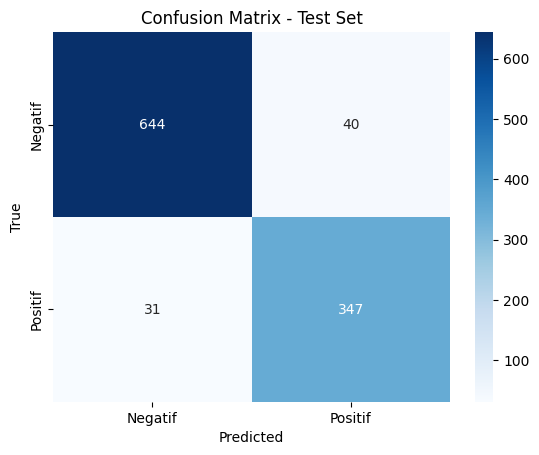


Accuracy: 0.9331
F1-Score: 0.9275


In [ ]:
CKPT_DIR = "/content/drive/MyDrive/Kodingan TA/indoBERT_model_tanpa_replies/best_model/checkpoint-2390"
BEST_DIR_MODEL = "/content/drive/MyDrive/Kodingan TA/indoBERT_model_tanpa_replies/best_model"
# Menggunakan model terbaik yang sudah disimpan
model = BertForSequenceClassification.from_pretrained(CKPT_DIR)
tokenizer = BertTokenizer.from_pretrained(BEST_DIR_MODEL)

# Membaca test data yang sudah dipisahkan
test_df = pd.read_csv("/content/drive/MyDrive/Kodingan TA/test_data.csv")

# Membuat dataset untuk test set
test_ds = IndoBERTDataset(test_df.text.tolist(), test_df.sentiment_label.tolist(), tokenizer)

# Argument untuk evaluasi
args = TrainingArguments(
    output_dir="./results",
    per_device_eval_batch_size=16,
    no_cuda=False,
    report_to="none",  # Disable reporting to avoid unnecessary logs
)

# Trainer untuk evaluasi model
trainer = Trainer(
    model=model,
    args=args,
    eval_dataset=test_ds,
    compute_metrics=compute_metrics  # Function untuk menghitung metrik evaluasi
)

# Melakukan evaluasi pada test set
metrics = trainer.evaluate(test_ds)
print("\nTest set evaluation results:")
print(metrics)

# Prediksi untuk mendapatkan sentimen dan metrik evaluasi
preds = trainer.predict(test_ds)
y_true = preds.label_ids
y_pred = preds.predictions.argmax(-1)

# Menampilkan classification report dan confusion matrix
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=["Negatif", "Positif"]))

# Visualisasi confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negatif", "Positif"], yticklabels=["Negatif", "Positif"])
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Menghitung dan menampilkan metrik evaluasi tambahan
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average="macro")

print(f"\nAccuracy: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")